# RandomForest modell.

In [41]:
import os
import cv2
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [42]:
dataset_path = "C:/Users/emmel/Desktop/sick_fishes/dataset/SB-FishDisease" #emmelies root

In [43]:
def read_and_make_list(dataset_path):
    data = []
    labels = []

    def extract_features(image_path):
    # Add your image processing code here
    # For simplicity, we'll resize the image to a fixed size (e.g., 64x64 pixels)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))
        features = image.flatten()
        return features

    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        
        if os.path.isdir(folder_path):
            label = 1 if "Healthy" in folder else 0  # 1 for healthy, 0 for sick
            
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                
                features = extract_features(file_path)

                data.append(features)
                labels.append(label)

    data = np.array(data)
    labels = np.array(labels)

    return data, labels

In [44]:
data, labels = read_and_make_list(dataset_path)

In [45]:
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (423, 12288)
Labels shape: (423,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [47]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [48]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = clf.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.82%


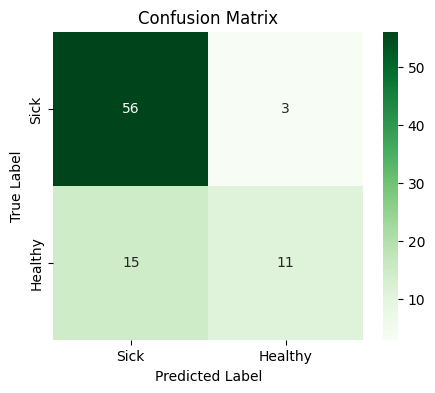

In [65]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Sick', 'Healthy'], yticklabels=['Sick', 'Healthy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Testning:

In [52]:
def predict_single_image(model, image_path):
        def extract_features(image_path):
            # Add your image processing code here
            # For simplicity, we'll resize the image to a fixed size (e.g., 64x64 pixels)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (64, 64))
            features = image.flatten()
            return features

        features = extract_features(image_path)
        
        features = features.reshape(1, -1)
        
        prediction = model.predict(features)
        probability = model.predict_proba(features)[:, 1]
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.imshow(img)
        plt.title(f"Prediction: {'Healthy' if prediction[0] == 1 else 'Sick'} (Probability: {probability[0]*100:.2f}%)")
        plt.axis('off')
        plt.show()

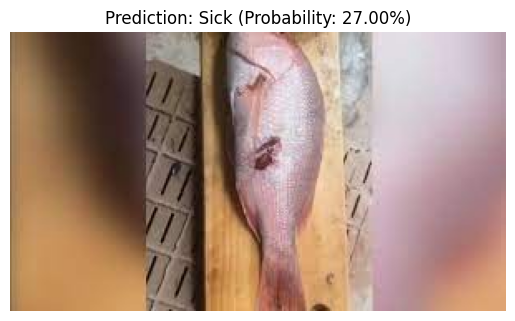

In [53]:
test_image_path = 'dataset/test_img/sick_fishy_1.jpg'

predict_single_image(clf, test_image_path)

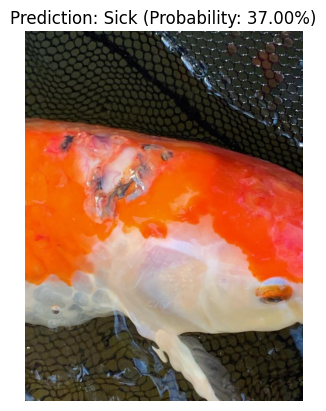

In [54]:
test_image_path = 'dataset/test_img/sick_koi_1.jpg'

predict_single_image(clf, test_image_path)

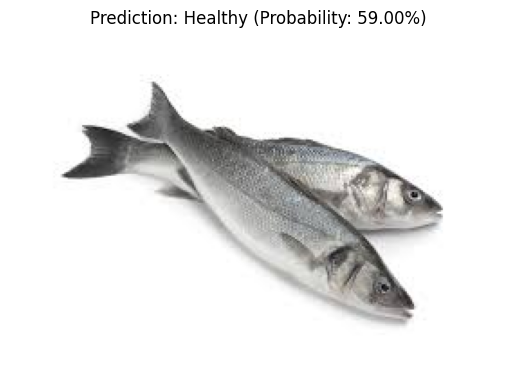

In [55]:
test_image_path = 'dataset/test_img/healthy_fishy_1.jpg'

predict_single_image(clf, test_image_path)

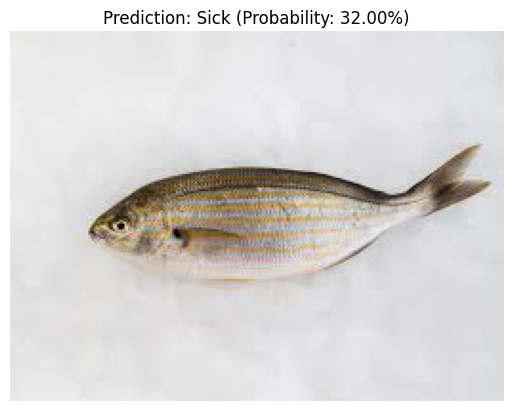

In [56]:
test_image_path = 'dataset/test_img/healthy_fishy_2.jpg'

predict_single_image(clf, test_image_path)

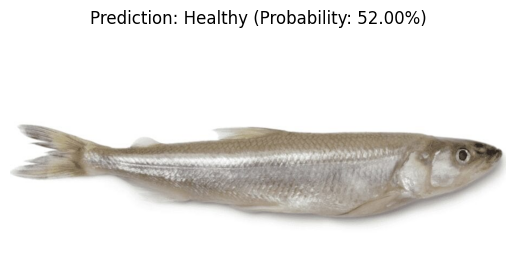

In [57]:
test_image_path = 'dataset/test_img/healthy_fishy_3.jpg'

predict_single_image(clf, test_image_path)